In [3875]:

import yfinance as yf
 
df = yf.download(tickers='BMW.DE', period='30d', interval='1h')
df_new = yf.download(tickers='BMW.DE', period='30d', interval='1h')
#df = yf.download(tickers = 'CL=F', start = '2021-03-11',end = '2022-07-10',interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3876]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-22 09:00:00+01:00,92.949997,93.720001,92.949997,93.580002,93.580002,0
2024-01-22 10:00:00+01:00,93.610001,93.769997,93.290001,93.580002,93.580002,61142
2024-01-22 11:00:00+01:00,93.599998,93.620003,93.169998,93.459999,93.459999,37578
2024-01-22 12:00:00+01:00,93.470001,93.620003,93.330002,93.470001,93.470001,57753
2024-01-22 13:00:00+01:00,93.449997,93.709999,93.379997,93.470001,93.470001,30145
...,...,...,...,...,...,...
2024-03-01 13:00:00+01:00,110.580002,110.839996,110.419998,110.800003,110.800003,114643
2024-03-01 14:00:00+01:00,110.760002,110.820000,110.379997,110.440002,110.440002,76098
2024-03-01 15:00:00+01:00,110.440002,110.480003,107.680000,109.660004,109.660004,285829


In [3877]:
import pandas as pd
import pandas_ta as ta

# Assuming df is your DataFrame containing OHLCV data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Close', 'Volume'

# Filter out rows with zero volume
df = df[df['Volume'] != 0]

# Convert the DataFrame index to datetime (assuming your index represents timestamps)
df.index = pd.to_datetime(df.index)

# Extract date and time features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

# Assuming your DataFrame index is in UTC, you might want to convert it to the timezone relevant for the European market
# Example:
# df = df.tz_localize('UTC').tz_convert('Europe/Paris')
# Reset the index without adding the previous index as a new column
df.reset_index(drop=True, inplace=True)

# Now the DataFrame will have a default integer index without the previous index as a column

# Calculate RSI with a length of 14
df['RSI'] = ta.rsi(df['Close'], length=14).fillna(method='bfill')

# Calculate EMA with a length of 4
df['EMA'] = ta.ema(df['Close'], length=4).fillna(method='bfill')

# Optionally, you might want to resample the data to 1-hour timeframe
# Example:
# df = df.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum', 'RSI': 'last', 'EMA': 'last'})

# Note: The resampling approach may vary depending on how you want to handle the OHLCV data

# Now you can use the modified DataFrame for further analysis or visualization
df


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\172582216.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\172582216.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\172582216.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335


In [3878]:
EMAsignal = [0]*len(df)
backcandles = 15

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(df.Open[i], df.Close[i])>=df.EMA[i]:
            dnt=0
        if min(df.Open[i], df.Close[i])<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        EMAsignal[row]=3
    elif upt==1:
        EMAsignal[row]=2
    elif dnt==1:
        EMAsignal[row]=1

df['EMASignal'] = EMAsignal

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3269106155.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3879]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0
    
    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].Low > df.iloc[i].Low:
            pivotLow=0
        if df.iloc[candle].High < df.iloc[i].High:
            pivotHigh=0
    if (pivotHigh and pivotLow):
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

In [3880]:
window=5
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\1837583093.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3881]:
import numpy as np
def pointpos(x):
    if x['isPivot']==2:
        return x['Low']-1e-3
    elif x['isPivot']==1:
        return x['High']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4123484669.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3882]:
import plotly.graph_objects as go
dfpl = df
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [3883]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    localdf = df[candle-backcandles-window:candle-window]  
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    idxhighs = localdf[localdf['isPivot'] == 1].High.tail(3).index
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    idxlows = localdf[localdf['isPivot'] == 2].Low.tail(3).index

    pattern_detected = False

    lim1 = df['High'].mean()-df['Low'].mean()
    lim2 = lim1/3
    if len(highs) == 3 and len(lows) == 3:
        order_condition = (idxlows[0] < idxhighs[0] 
                           < idxlows[1] < idxhighs[1] 
                           < idxlows[2] < idxhighs[2])
        diff_condition = ( 
                            abs(lows[0]-highs[0])>lim1 and 
                            abs(highs[0]-lows[1])>lim2 and
                            abs(highs[1]-lows[1])>lim1 and
                            abs(highs[1]-lows[2])>lim2
                            )
        pattern_1 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] > lows[1] and lows[2] < highs[1] and
            highs[2] < highs[1] and highs[2] > lows[2]
            )

        pattern_2 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] < lows[1] and
            highs[2] < highs[1] 
            )

        if (order_condition and
            diff_condition and
            (pattern_1 or pattern_2)
        ):
            pattern_detected = True

    if pattern_detected:
        return 1
    else:
        return 0

In [3884]:
df['CHOCH_pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=6))

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2957290366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3885]:
df[df['CHOCH_pattern_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected


In [3886]:
def generate_signal(df, l, backcandles, gap, zone_threshold, price_diff_threshold):
    if l < backcandles + gap or l >= len(df):
        return (0, 0, 0, 0, 0)  # Return neutral signal if not enough data

    max_price = df.High[l - backcandles:l - gap].max()
    min_price = df.Low[l - backcandles:l - gap].min()
    index_max = df.High[l - backcandles:l - gap].idxmax()
    index_min = df.Low[l - backcandles:l - gap].idxmin()
    price_diff = max_price - min_price

    if (df.EMASignal[l] == 2 and 
        (index_min < index_max) and 
        price_diff > price_diff_threshold):
        
        entry_price = max_price - 0.52 * price_diff
        stop_loss = max_price - 0.68 * price_diff
        take_profit = max_price - 0. * price_diff
        
        if abs(df.Close[l] - entry_price) < zone_threshold and df.High[l - gap:l].min() > entry_price:
            return (2, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    elif (df.EMASignal[l] == 1 and 
          (index_min > index_max) and 
          price_diff > price_diff_threshold):
        
        entry_price = min_price + 0.52 * price_diff
        stop_loss = min_price + 0.68 * price_diff
        take_profit = min_price + 0. * price_diff
        
        if abs(df.Close[l] - entry_price) < zone_threshold and df.Low[l - gap:l].max() < entry_price:
            return (1, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    else:
        return (0, 0, 0, 0, 0)
    # Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
signal = [0] * len(df)
TP = [0] * len(df)
SL = [0] * len(df)
MinSwing = [0] * len(df)
MaxSwing = [0] * len(df)

for row in range(backcandles, len(df)):
    gen_sig = generate_signal(df, row, backcandles=backcandles, gap=gap_candles, zone_threshold=zone_threshold,
                               price_diff_threshold=price_diff_threshold)
    signal[row] = gen_sig[0]
    SL[row] = gen_sig[1]
    TP[row] = gen_sig[2]
    MinSwing[row] = gen_sig[3]
    MaxSwing[row] = gen_sig[4]

# Add the generated signals to the DataFrame
df['fibonacci_signal'] = signal
df['SL'] = SL
df['TP'] = TP
df['MinSwing'] = MinSwing
df['MaxSwing'] = MaxSwing


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4173904598.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4173904598.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4173904598.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [3887]:
df[df.fibonacci_signal !=0][:10]
#df.head(50)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing


In [3888]:
def detect_structure(candle, backcandles, window):
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0
    
    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak


In [3889]:
#df['pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=15))
df['LBD_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=40, window=6), axis=1)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3359569294.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3890]:
df[df['LBD_detected']!=0].head(25)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected
50,94.900002,96.279999,94.720001,95.690002,95.690002,98727,2024,1,30,12,0,72.125942,95.106141,0,1,96.280999,0,0,0,0,0,0,2
154,103.779999,103.980003,103.639999,103.900002,103.900002,62935,2024,2,16,11,0,70.024987,103.359213,0,0,NaN,0,0,0,0,0,0,2
155,103.860001,104.199997,103.720001,103.959999,103.959999,82475,2024,2,16,12,0,70.422773,103.599527,0,0,NaN,0,0,0,0,0,0,2
156,104.019997,104.440002,103.919998,104.099998,104.099998,164753,2024,2,16,13,0,71.377279,103.799716,0,1,104.441002,0,0,0,0,0,0,2
157,104.120003,104.339996,104.000000,104.300003,104.300003,43314,2024,2,16,14,0,72.731178,103.999831,0,0,NaN,0,0,0,0,0,0,2
159,103.839996,104.160004,103.760002,103.959999,103.959999,39346,2024,2,16,16,0,66.369397,103.955138,0,0,NaN,0,0,0,0,0,0,2
161,103.540001,103.900002,103.540001,103.900002,103.900002,20352,2024,2,19,10,0,65.200721,103.915050,0,0,NaN,0,0,0,0,0,0,2


In [3891]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0
    
    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak

In [3892]:

df['LBH_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=60, window=11), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4291690040.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3893]:
df[df['LBH_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected
159,103.839996,104.160004,103.760002,103.959999,103.959999,39346,2024,2,16,16,0,66.369397,103.955138,0,0,NaN,0,0,0,0,0,0,2,2
161,103.540001,103.900002,103.540001,103.900002,103.900002,20352,2024,2,19,10,0,65.200721,103.915050,0,0,NaN,0,0,0,0,0,0,2,2


In [3894]:
wick_threshold = df['High'].max()-df['Low'].min()
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.Low[l-n1:l].min() < df1.Low[l] or
        df1.Low[l+1:l+n2+1].min() < df1.Low[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    Lower_wick = min(df1.Open[l], df1.Close[l])-df1.Low[l]
    if (Lower_wick > candle_body) and (Lower_wick > wick_threshold): 
        return 1
    
    return 0

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.High[l-n1:l].max() > df1.High[l] or
       df1.High[l+1:l+n2+1].max() > df1.High[l] ):
        return 0
    
    candle_body = abs(df1.Open[l]-df1.Close[l])
    upper_wick = df1.High[l]-max(df1.Open[l], df1.Close[l])
    if (upper_wick > candle_body) and (upper_wick > wick_threshold) :
        return 1

    return 0

In [3895]:
def CloseResistance(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.High[l]-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c2 = abs(max(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c3 = min(df.Open[l],df.Close[l])<min(levels, key=lambda x:abs(x-df.High[l]))
    c4 = df.Low[l]<min(levels, key=lambda x:abs(x-df.High[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.High[l]))
    else:
        return 0
    
def CloseSupport(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.Low[l]-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c2 = abs(min(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c3 = max(df.Open[l],df.Close[l])>min(levels, key=lambda x:abs(x-df.Low[l]))
    c4 = df.High[l]>min(levels, key=lambda x:abs(x-df.Low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.Low[l]))
    else:
        return 0

In [3896]:
def is_below_resistance(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'High'].max() < level

def is_above_support(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'Low'].min() > level        

In [3897]:
def check_candle_signal(l, n1, n2, backCandles, df):
    ss = []
    rr = []
    for subrow in range(l-backCandles, l-n2):
        if support(df, subrow, n1, n2):
            ss.append(df.Low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.High[subrow])
    
    ss.sort() #keep lowest support when popping a level
    for i in range(1,len(ss)):
        if(i>=len(ss)):
            break
        if abs(ss[i]-ss[i-1])<=0.0001: # merging close distance levels
            ss.pop(i)

    rr.sort(reverse=True) # keep highest resistance when popping one
    for i in range(1,len(rr)):
        if(i>=len(rr)):
            break
        if abs(rr[i]-rr[i-1])<=0.0001: # merging close distance levels
            rr.pop(i)

    #----------------------------------------------------------------------
    # joined levels
    rrss = rr+ss
    rrss.sort()
    for i in range(1,len(rrss)):
        if(i>=len(rrss)):
            break
        if abs(rrss[i]-rrss[i-1])<=0.0001: # merging close distance levels
            rrss.pop(i)
    cR = CloseResistance(l, rrss, 150e-5, df)
    cS = CloseSupport(l, rrss, 150e-5, df)
    #----------------------------------------------------------------------

    # cR = closeResistance(l, rr, 150e-5, df)
    # cS = closeSupport(l, ss, 150e-5, df)
    # could we consider the average RSI for the trend momentum?
    if (cR and is_below_resistance(l,6,cR, df) and df.RSI[l-1:l].min()<45 ):#and df.RSI[l]>65
        return 1
    elif(cS and is_above_support(l,6,cS,df) and df.RSI[l-1:l].max()>55 ):#and df.RSI[l]<35
        return 2
    else:
        return 0



In [3898]:
from tqdm import tqdm

n1 = 8
n2 = 6
backCandles = 140

signal = [0 for i in range(len(df))]

for row in tqdm(range(backCandles+n1, len(df)-n2)):
    signal[row] = check_candle_signal(row, n1, n2, backCandles, df)

df["SR_signal"] = signal


100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:06<00:00, 13.58it/s]
C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\1203635642.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3899]:
df[ (df['SR_signal']==1) | (df['SR_signal']==2)]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal


In [3900]:
from scipy import stats

def collect_channel(candle, backcandles, window):
    #localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name,window), axis=1)
    highs = df[df['isPivot']==1].High.values
    idxhighs = df[df['isPivot']==1].High.index
    lows = df[df['isPivot']==2].Low.values
    idxlows = df[df['isPivot']==2].Low.index
    
    if len(lows)>=3 and len(highs)>=3:
        sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows,lows)
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)
    
        return(sl_lows, interc_lows, sl_highs, interc_highs, r_value_l**2, r_value_h**2)
    else:
        return(0,0,0,0,0,0)

In [3901]:
df['Channel'] = [collect_channel(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2308862996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3902]:
def isBreakOut(candle, backcandles, window):
    if (candle-backcandles-window)<0:
        return 0
    
    sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = df.iloc[candle].Channel
    
    prev_idx = candle-1
    prev_high = df.iloc[candle-1].High
    prev_low = df.iloc[candle-1].Low
    prev_close = df.iloc[candle-1].Close
    
    curr_idx = candle
    curr_high = df.iloc[candle].High
    curr_low = df.iloc[candle].Low
    curr_close = df.iloc[candle].Close
    curr_open = df.iloc[candle].Open

    if ( prev_high > (sl_lows*prev_idx + interc_lows) and
        prev_close < (sl_lows*prev_idx + interc_lows) and
        curr_open < (sl_lows*curr_idx + interc_lows) and
        curr_close < (sl_lows*prev_idx + interc_lows)): #and r_sq_l > 0.9
        return 1
    
    elif ( prev_low < (sl_highs*prev_idx + interc_highs) and
        prev_close > (sl_highs*prev_idx + interc_highs) and
        curr_open > (sl_highs*curr_idx + interc_highs) and
        curr_close > (sl_highs*prev_idx + interc_highs)): #and r_sq_h > 0.9
        return 2
    
    else:
        return 0

In [3903]:
df["isBreakOut"] = [isBreakOut(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\121421734.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3904]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0


In [3905]:
length = len(df)
High = list(df['High'])
Low = list(df['Low'])
Close = list(df['Close'])
Open = list(df['Open'])
bodydiff = [0] * length

Highdiff = [0] * length
Lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001      

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and 
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and 
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>Open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
    
    
def isEngulfingStrong(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001      

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and 
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Low[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and 
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>High[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
    
def isStar(l):
    bodydiffmin = 0.020
    row=l
    Highdiff[row] = High[row]-max(Open[row],Close[row])
    Lowdiff[row] = min(Open[row],Close[row])-Low[row]
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001
    ratio1[row] = Highdiff[row]/bodydiff[row]
    ratio2[row] = Lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and Lowdiff[row]<0.2*Highdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]>Close[row]):
        return 1
    elif (ratio2[row]>1 and Highdiff[row]<0.2*Lowdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]<Close[row]):
        return 2
    else:
        return 0

def direction(l):
    if (Open[l]>Close[l]):
        return 1
    elif (Open[l]<Close[l]):
        return 2
    else:
        return 0
    

In [3906]:
def Revsignal1():
    signal = [0] * length
    for row in range(1, length):
        if ((isEngulfing(row)==1 and isStar(row)==1) ):#and df.RSI[row]<30
            signal[row] = 1
        elif((isEngulfing(row)==2 and isStar(row)==2) ):#and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    return signal

df['candlestick_signal'] = Revsignal1()
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\4196123327.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0


In [3907]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length
    
    piplim = 200e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if( ((High[line+i]-Close[line])>piplim) and ((Close[line]-Low[line+i])>piplim) ):
                trendcat[line] = 3 # no trend
                break
            elif(Close[line]-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif ((High[line+i]-Close[line])>piplim):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

df['Trend'] = mytarget(df,10)
#df.head(30)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\1906622683.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3908]:
import numpy as np
conditions = [( (df['Trend'] == 1) | (df['Trend'] == 3) ) & (df['candlestick_signal'] == 1), ((df['Trend'] == 2) | (df['Trend'] == 3)) & (df['candlestick_signal'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=1
print(df[df['result']==trendId].result.count()/df[df['candlestick_signal']==trendId].candlestick_signal.count())
df[ (df['Trend']!=trendId) & (df['Trend']!=3) & (df['candlestick_signal']==trendId) ] # false positives

nan


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3693821812.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3693821812.py:7: RuntimeWarning:

invalid value encountered in longlong_scalars



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result


In [3909]:
#Engulfing pattern signals
import random
def Revsignal1(df1):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(Open[row]-Close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]<Close[row-1] and
            Open[row]>Close[row] and 
            #Open[row]>=Close[row-1] and Close[row]<Open[row-1]):
            (Open[row]-Close[row-1])>=+0e-5 and Close[row]<Open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]>Close[row-1] and
            Open[row]<Close[row] and 
            #Open[row]<=Close[row-1] and Close[row]>Open[row-1]):
            (Open[row]-Close[row-1])<=-0e-5 and Close[row]>Open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
df['signal1'] = Revsignal1(df)
df[df['signal1']==1].count()

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2678843027.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Open                      13
High                      13
Low                       13
Close                     13
Adj Close                 13
Volume                    13
Year                      13
Month                     13
Day                       13
Hour                      13
Minute                    13
RSI                       13
EMA                       13
EMASignal                 13
isPivot                   13
pointpos                   2
CHOCH_pattern_detected    13
fibonacci_signal          13
SL                        13
TP                        13
MinSwing                  13
MaxSwing                  13
LBD_detected              13
LBH_detected              13
SR_signal                 13
Channel                   13
isBreakOut                13
candlestick_signal        13
Trend                     13
result                    13
signal1                   13
dtype: int64

In [3910]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length
    
    piplim = 300e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((High[line+i]-max(Close[line],Open[line]))>piplim) and ((min(Close[line],Open[line])-Low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(Close[line],Open[line])-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (High[line+i]-max(Close[line],Open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

df['Trend'] = mytarget(df,3)
#df.head(30)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\168645108.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3911]:
import numpy as np
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=2
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # false positives

0.8888888888888888


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2758554939.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1
53,95.080002,95.330002,94.730003,95.290001,95.290001,60599,2024,1,30,15,0,62.851811,95.189807,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,2,1.0,0,2
240,109.440002,109.900002,109.419998,109.800003,109.800003,36021,2024,3,1,17,0,56.234555,109.849402,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,2


In [3912]:
import pandas as pd
import ta
from ta.volatility import BollingerBands

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate 20-period moving average
df['ma20'] = df['Close'].rolling(window=20).mean()

# Fill missing values in the 'ma20' column with the mean of the column
df['ma20'].fillna(df['ma20'].bfill(), inplace=True)

# Adjust parameters for 1-hour timeframe
window = 20  # 20-period window
window_dev = 2  # 2 standard deviations

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=window, window_dev=window_dev)

# Add Bollinger Bands features
df['middle_band'] = indicator_bb.bollinger_mavg()
df['upper_band'] = indicator_bb.bollinger_hband()
df['lower_band'] = indicator_bb.bollinger_lband()

# Fill missing values in Bollinger Bands columns with the mean of the respective columns
df['middle_band'].fillna(df['middle_band'].bfill(), inplace=True)
df['upper_band'].fillna(df['upper_band'].bfill(), inplace=True)
df['lower_band'].fillna(df['lower_band'].bfill(), inplace=True)
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3366889306.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3366889306.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\3366889306.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2651267675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2651267675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\2651267675.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

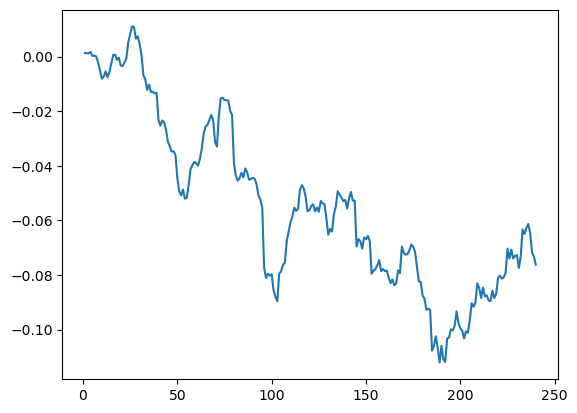

In [3913]:
# Buy when the price breaks above the upper Bollinger Band
df['buy_signal'] = df['Close'] > df['upper_band']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the 20-day moving average
df['sell_signal'] = df['Close'] < df['ma20']
df.loc[df['sell_signal'] == True, 'Position'] = -1

# Forward fill the position column to ensure we hold onto our position 
# until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()

In [3914]:
import tapy as ta
from tapy import Indicators

i = Indicators(df)
i.fractals(column_name_high='fractal_high', column_name_low='fractal_low')
df = i.df

# Buy when the price breaks above the fractal high
df['buy_signal1'] = df['Close'] > df['fractal_high']
df.loc[df['buy_signal1'] == True, 'Position'] = 1

# Sell when the price drops below the fractal low
df['sell_signal1'] = df['Close'] < df['fractal_low']
df.loc[df['sell_signal1'] == True, 'Position'] = -1

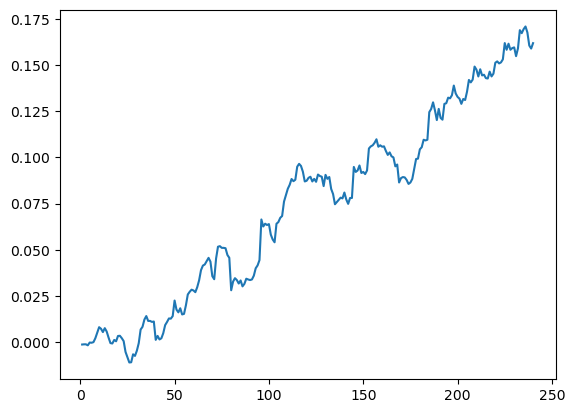

In [3915]:

# Forward fill the position column to ensure we hold onto our position until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()


In [3916]:
i = Indicators(df)
i.fractals(column_name_high='fractals_high', column_name_low='fractals_low')
df = i.df
df.tail()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682,False,1.0,True,-0.001641,False,False,True,False,False,False
240,109.440002,109.900002,109.419998,109.800003,109.800003,36021,2024,3,1,17,0,56.234555,109.849402,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,2,109.638000,109.638000,110.936302,108.339699,False,1.0,False,0.002923,False,False,True,False,False,False


In [3917]:
VSignal = [0] * len(df)
vbackcandles = 1
for row in range(vbackcandles+1, len(df)):
    VSignal[row] = 1
    for i in range(row-vbackcandles, row):
        if df.Volume[row]<df.Volume[i] and df.Volume[row-1]<df.Volume[row-2]:
            VSignal[row]=0
df['VSignal']=VSignal


In [3918]:
PriceSignal = [0]*len(df)
pbackcandles = 4
for row in range(pbackcandles, len(df)):
    PriceSignal[row] = 1
    for i in range(row-pbackcandles, row):
        if df.EMASignal[row] == 1: #downtrend
            if df.Open[row]<=df.Close[row]: #downcandle row
                PriceSignal[row]=0
            elif df.Open[i]>df.Close[i]: #downcandle i we are looking for 4 upcandles
                PriceSignal[row]=0
        if df.EMASignal[row] == 2: #uptrend
            if df.Open[row]>=df.Close[row]: #upcandle row
                PriceSignal[row]=0
            elif df.Open[i]<df.Close[i]: #upcandle i we are looking for 4 dowcandles
                PriceSignal[row]=0
        else:
            PriceSignal[row] = 0

df['PriceSignal']=PriceSignal


In [3919]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    if df.EMASignal[row]==1 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=1
    if df.EMASignal[row]==2 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=2

df['TotSignal']=TotSignal


In [3920]:
SLSignal = [0] * len(df)
SLbackcandles = 4
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.EMASignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.EMASignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal']=SLSignal

In [3921]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.352953,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,65.000919,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,55.202219,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,53.208810,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682,False,1.0,True,-0.001641,False,False,True,False,False,False,1,0,0,0


In [3922]:
grid_distance = 0.005
midprice = df['High'].median()

In [3923]:
def generate_grid(midprice, grid_distance, grid_range):
    return (np.arange(midprice-grid_range, midprice+grid_range, grid_distance))

grid = generate_grid(midprice=midprice, grid_distance=grid_distance, grid_range=0.1)
grid


array([101.52000275, 101.52500275, 101.53000275, 101.53500275,
       101.54000275, 101.54500275, 101.55000275, 101.55500275,
       101.56000275, 101.56500275, 101.57000275, 101.57500275,
       101.58000275, 101.58500275, 101.59000275, 101.59500275,
       101.60000275, 101.60500275, 101.61000275, 101.61500275,
       101.62000275, 101.62500275, 101.63000275, 101.63500275,
       101.64000275, 101.64500275, 101.65000275, 101.65500275,
       101.66000275, 101.66500275, 101.67000275, 101.67500275,
       101.68000275, 101.68500275, 101.69000275, 101.69500275,
       101.70000275, 101.70500275, 101.71000275, 101.71500275])

In [3924]:
signal = [0]*len(df)
i=0
for index, row in df.iterrows():
    for p in grid:
        if min(row.Low, row.High)<p and max(row.Low, row.High)>p:
            signal[i]=1
    i+=1

In [3925]:
df["grid_signal"]=signal
df[df["grid_signal"]==1]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal
110,101.260002,101.839996,101.180000,101.580002,101.580002,96615,2024,2,8,15,0,77.209294,101.017853,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",2,0,2.0,0,0,99.229999,99.229999,101.902797,96.557201,False,1.0,False,0.003557,False,False,True,False,False,False,1,0,0,0,1
111,101.580002,102.360001,101.500000,101.800003,101.800003,108211,2024,2,8,16,0,78.241668,101.330713,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",2,0,2.0,0,0,99.482499,99.482499,102.124417,96.840582,False,1.0,False,0.002166,True,False,True,False,True,False,1,0,0,0,1
112,101.820000,102.220001,101.620003,102.120003,102.120003,85064,2024,2,8,17,0,79.683261,101.646429,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,99.741000,99.741000,102.352706,97.129293,False,1.0,False,0.003143,False,False,True,False,False,False,1,0,0,0,1
129,100.879997,101.720001,100.660004,101.720001,101.720001,52204,2024,2,13,10,0,54.369971,102.024432,0,2,100.659004,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,102.189000,102.189000,102.897741,101.480260,False,1.0,True,-0.005086,False,True,True,False,False,True,1,0,0,0,1
130,101.720001,102.580002,101.680000,102.339996,102.339996,40686,2024,2,13,11,0,61.392002,102.150658,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,102.227000,102.227000,102.880392,101.573608,False,1.0,False,0.006095,True,False,True,False,True,False,1,0,0,0,1
133,102.220001,102.519997,101.559998,101.559998,101.559998,48213,2024,2,13,14,0,49.737351,101.926622,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,1,1,102.226000,102.226000,102.910934,101.541066,False,1.0,True,-0.006457,True,False,True,False,True,False,1,0,0,0,1
134,101.580002,101.620003,101.199997,101.279999,101.279999,37069,2024,2,13,15,0,46.381999,101.667973,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,102.186000,102.186000,102.984408,101.387592,False,1.0,True,-0.002757,False,False,True,False,False,False,1,0,0,0,1
169,102.139999,102.180000,101.559998,101.879997,101.879997,65311,2024,2,20,10,0,36.276103,102.581127,0,2,101.558998,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,103.391999,103.391999,104.713478,102.070521,False,1.0,True,-0.009720,False,True,True,False,False,True,1,0,0,0,1
174,102.000000,102.000000,101.680000,101.800003,101.800003,40517,2024,2,20,15,0,36.597460,102.014802,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,103.151999,103.151999,104.801454,101.502545,False,1.0,True,-0.002156,False,False,True,False,False,False,1,0,0,0,1
175,101.760002,101.940002,101.320000,101.879997,101.879997,87094,2024,2,20,16,0,38.140755,101.960880,0,2,101.319000,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,103.047999,103.047999,104.742243,101.353755,False,1.0,True,0.000786,False,True,True,False,False,True,1,0,0,0,1


In [3926]:
df['Heiken_Close'] = (df.Open+df.Close+df.High+df.Low)/4
df['Heiken_Open'] = df['Open']
for i in range(1, len(df)):
    df['Heiken_Open'][i] = (df.Heiken_Open[i-1]+df.Heiken_Close[i-1])/2

df['Heiken_High'] = df[['High', 'Heiken_Open', 'Heiken_Close']].max(axis=1)
df['Heiken_Low'] = df[['Low', 'Heiken_Open', 'Heiken_Close']].min(axis=1)
df.head(10)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\1014696069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,63.969941,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,63.969941,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001
5,93.400002,93.730003,93.290001,93.559998,93.559998,56521,2024,1,22,15,0,63.969941,93.502999,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,2,2,93.7595,93.7595,94.369629,93.149371,False,1.0,True,0.001499,False,False,True,False,False,False,1,0,0,0,0,93.495001,93.473984,93.730003,93.290001
6,93.559998,93.889999,93.510002,93.550003,93.550003,88443,2024,1,22,16,0,63.969941,93.521801,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,-0.000107,True,False,True,False,True,False,1,0,0,0,0,93.627501,93.484493,93.889999,93.484493
7,93.559998,93.639999,93.410004,93.580002,93.580002,48196,2024,1,22,17,0,63.969941,93.545081,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,True,0.000321,False,False,True,False,False,False,1,0,0,0,0,93.547501,93.555997,93.639999,93.410004
8,93.250000,93.820000,93.250000,93.779999,93.779999,22248,2024,1,23,10,0,63.969941,93.639048,0,2,93.249,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,False,0.002137,False,True,True,False,False,True,0,0,0,0,0,93.525000,93.551749,93.820000,93.250000
9,93.779999,94.070000,93.269997,94.059998,94.059998,54911,2024,1,23,11,0,63.969941,93.807428,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.7595,93.7595,94.369629,93.149371,False,1.0,False,0.002986,False,False,True,False,False,False,1,0,0,0,0,93.794998,93.538374,94.070000,93.269997


In [3927]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate Exponential Moving Averages (EMAs) and RSI
df["EMA20"] = ta.ema(df.Close, length=20)
df["EMA50"] = ta.ema(df.Close, length=50)
df['RSI'] = ta.rsi(df.Close, length=12)

# Fill missing values for the specified columns using backfill
columns_to_fill = ["EMA20", "EMA50", "RSI"]
df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')


In [3928]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682,False,1.0,True,-0.001641,False,False,True,False,False,False,1,0,0,0,0,109.615002,110.060011,110.060011,109.360001,109.512713,108.095113


In [3929]:
import plotly.graph_objects as go
from datetime import datetime
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=df['Heiken_Open'],
                high=df['Heiken_High'],
                low=df['Heiken_Low'],
                close=df['Heiken_Close']),
                     go.Scatter(x=df.index, y=df.EMA20, line=dict(color='red', width=1), name="EMA20"),
                     go.Scatter(x=df.index, y=df.EMA50, line=dict(color='blue', width=1), name="EMA50")])

fig.show()

In [3930]:
def totalSignal(df):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if (df.EMA20[i]>df.EMA50[i] and df.Heiken_Open[i]<df.EMA20[i] 
            and df.Heiken_Close[i]>df.EMA20[i]):
            ordersignal[i]=2
        if (df.EMA20[i]<df.EMA50[i] and df.Heiken_Open[i]>df.EMA20[i] 
            and df.Heiken_Close[i]<df.EMA20[i]):
            ordersignal[i]=1
    df['ordersignal']=ordersignal

totalSignal(df)

In [3931]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682,False,1.0,True,-0.001641,False,False,True,False,False,False,1,0,0,0,0,109.615002,110.060011,110.060011,1

In [3932]:
# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal_heiken']=SLSignal# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi
        
df['SLSignal_heiken']=SLSignal

In [3933]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0,0.0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0,0.0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0,0.0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0,0.0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0,0.0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0,0.0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0,0.0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.581001,109.581001,110.944319,108.217682,False,1.0,True,-0.001641,False,False,True,False,Fals

In [3934]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate ADX
a = ta.adx(df.High, df.Low, df.Close, length=14)

# Join ADX_14 column to the DataFrame
df = df.join(a.ADX_14)

# Fill missing values for ADX_14 column using backfill
df['ADX_14'].fillna(method='bfill', inplace=True)


In [3935]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal1'] = emasignal

addemasignal(df,6)

In [3936]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0,0.0,23.381935,0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0,0.0,23.381935,0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0,0.0,23.381935,0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0,0.0,23.381935,0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0,0.0,23.381935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0,0.0,40.314532,0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0,0.0,41.055202,0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0,0.0,39.347288,0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.2355498841921

In [3937]:
def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['long_signal']=ordersignal

totalSignal(df, df.ADX_14)

In [3938]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0,0.0,23.381935,0,0
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0,0.0,23.381935,0,0
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0,0.0,23.381935,0,0
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0,0.0,40.314532,0,0
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0,0.0,41.055202,0,0
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0,0.0,39.347288,0,0
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.882335,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.07

In [3939]:
import numpy as np
df['martiangle_signal'] = np.random.random(len(df))
df['martiangle_signal'] = df['martiangle_signal'].apply(lambda x: 1 if x<0.5 else 2)

In [3940]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0,2
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0,0.0,23.381935,0,0,2
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0,0.0,23.381935,0,0,2
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0,0.0,23.381935,0,0,2
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0,0.0,40.314532,0,0,1
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0,0.0,41.055202,0,0,1
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,NaN,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0,0.0,39.347288,0,0,1
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.8

In [3941]:
df['Trend'].fillna('4.0', inplace=True)


In [3942]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,93.610001,93.769997,93.290001,93.580002,93.580002,61142,2024,1,22,10,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,NaN,False,False,True,False,False,False,0,0,0,0,0,93.562500,93.610001,93.769997,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0,2
1,93.599998,93.620003,93.169998,93.459999,93.459999,37578,2024,1,22,11,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.001282,False,False,True,False,False,False,0,0,0,0,0,93.462500,93.586250,93.620003,93.169998,93.759500,93.861600,0,0.0,23.381935,0,0,2
2,93.470001,93.620003,93.330002,93.470001,93.470001,57753,2024,1,22,12,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,3.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000107,False,False,True,False,False,False,1,0,0,0,0,93.472502,93.524375,93.620003,93.330002,93.759500,93.861600,0,0.0,23.381935,0,0,2
3,93.449997,93.709999,93.379997,93.470001,93.470001,30145,2024,1,22,13,0,68.358045,93.495001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,0.000000,False,False,True,False,False,False,1,0,0,0,0,93.502499,93.498438,93.709999,93.379997,93.759500,93.861600,0,0.0,23.381935,0,0,2
4,93.459999,93.620003,93.290001,93.419998,93.419998,39838,2024,1,22,14,0,68.358045,93.465000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,2.0,0,0,93.759500,93.759500,94.369629,93.149371,False,1.0,True,-0.000535,False,False,True,False,False,False,1,0,0,0,0,93.447500,93.500468,93.620003,93.290001,93.759500,93.861600,0,0.0,23.381935,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,110.580002,110.839996,110.419998,110.800003,110.800003,114643,2024,3,1,13,0,70.987978,110.502651,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,1.0,0,0,109.303000,109.303000,111.004072,107.601928,False,1.0,False,0.001446,True,False,True,False,True,False,1,0,0,0,0,110.660000,110.360078,110.839996,110.360078,109.402173,107.871688,0,0.0,40.314532,0,0,1
237,110.760002,110.820000,110.379997,110.440002,110.440002,76098,2024,3,1,14,0,64.732482,110.477592,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,4.0,0,0,109.418000,109.418000,111.099900,107.736100,False,1.0,False,-0.003249,False,False,True,False,False,False,1,0,0,0,0,110.600000,110.510039,110.820000,110.379997,109.501014,107.972406,0,0.0,41.055202,0,0,1
238,110.440002,110.480003,107.680000,109.660004,109.660004,285829,2024,3,1,15,0,53.573890,110.150557,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0703082008356025, 91.23554988419212, 0.0756...",0,0,4.0,0,0,109.508000,109.508000,111.032017,107.983983,False,1.0,False,-0.007063,False,True,True,False,False,True,1,0,0,0,0,109.565002,110.555020,110.555020,107.680000,109.516156,108.038586,0,0.0,39.347288,0,0,1
239,109.680000,109.940002,109.360001,109.480003,109.480003,38603,2024,3,1,16,0,51.345667,109.8

In [3943]:
df['Strategy Returns'].isna().sum()

1

In [3944]:
df['Strategy Returns'].dropna(inplace=True)

In [3945]:
df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
                    ..
SLSignal_heiken      0
ADX_14               0
EMASignal1           0
long_signal          0
martiangle_signal    0
Length: 62, dtype: int64

In [3946]:
# Assuming 'df' is your DataFrame containing OHLC data

# Calculate the difference between the current 'Close' and the previous 'Close'
df['Close_diff'] = df['Close'].diff()

# Create a new column indicating whether the candle is up or down from the previous one
df['Candle_direction'] = 'Up'  # By default, set all candles to 'Up'

# Set 'Candle_direction' to 'Down' for candles with a negative 'Close_diff'
df.loc[df['Close_diff'] < 0, 'Candle_direction'] = 'Down'

# Replace 'Up' by 1 and 'Down' by 2
df['Candle_direction'].replace({'Up': 1, 'Down': 2}, inplace=True)

# Drop the 'Close_diff' column if you don't need it anymore
df.drop(columns=['Close_diff'], inplace=True)


In [3947]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    241 non-null    float64
 1   High                    241 non-null    float64
 2   Low                     241 non-null    float64
 3   Close                   241 non-null    float64
 4   Adj Close               241 non-null    float64
 5   Volume                  241 non-null    int64  
 6   Year                    241 non-null    int64  
 7   Month                   241 non-null    int64  
 8   Day                     241 non-null    int64  
 9   Hour                    241 non-null    int64  
 10  Minute                  241 non-null    int64  
 11  RSI                     241 non-null    float64
 12  EMA                     241 non-null    float64
 13  EMASignal               241 non-null    int64  
 14  isPivot                 241 non-null    in

In [3948]:
df_cleaned=df.drop(['Open','High','Low','Close','Adj Close',
                  'Volume','RSI','EMA','ma20','middle_band','upper_band'
                  ,'lower_band','Strategy Returns','Heiken_Close','Heiken_Open',
                  'Heiken_High','Heiken_Low','EMA20','EMA50','ADX_14','pointpos','Channel','Trend'],axis='columns')

In [3949]:
df_cleaned

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2024,1,22,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,0,0,0,0,0,0,0.0,0,0,2,1
1,2024,1,22,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,0,0,0,0,0,0,0.0,0,0,2,2
2,2024,1,22,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0,0,0,0.0,0,0,2,1
3,2024,1,22,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0,0,0,0.0,0,0,2,1
4,2024,1,22,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0,0,0,0.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2024,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,True,False,True,False,True,False,1,0,0,0,0,0,0.0,0,0,1,1
237,2024,3,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,False,True,False,False,False,1,0,0,0,0,0,0.0,0,0,1,2
238,2024,3,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,True,True,False,False,True,1,0,0,0,0,0,0.0,0,0,1,2
239,2024,3,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0,0,0,0.0,0,0,2,2


In [3950]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    241 non-null    int64  
 1   Month                   241 non-null    int64  
 2   Day                     241 non-null    int64  
 3   Hour                    241 non-null    int64  
 4   Minute                  241 non-null    int64  
 5   EMASignal               241 non-null    int64  
 6   isPivot                 241 non-null    int64  
 7   CHOCH_pattern_detected  241 non-null    int64  
 8   fibonacci_signal        241 non-null    int64  
 9   SL                      241 non-null    int64  
 10  TP                      241 non-null    int64  
 11  MinSwing                241 non-null    int64  
 12  MaxSwing                241 non-null    int64  
 13  LBD_detected            241 non-null    int64  
 14  LBH_detected            241 non-null    in

In [3951]:
df = df_cleaned.dropna()

In [3952]:
# Create a boolean DataFrame indicating the locations of NaN values
na_locations = df.isna()

# Get the row and column indices where NaN values occur
rows, cols = np.where(na_locations)

# Print the row and column indices of NaN values
for row, col in zip(rows, cols):
    print(f"NaN value found at row {row} and column {col}")


In [3953]:
import pandas as pd

# Assuming df is your DataFrame and 'specific_column' is the name of the column you want to modify
# Replace 'specific_column' with the actual name of your column

df_cleaned['Candle_direction'] = df_cleaned['Candle_direction'].replace(2, 0)


In [3954]:
import pandas as pd

# Convert boolean column to integer
df_cleaned['buy_signal'] = df_cleaned['buy_signal'].astype(int)
df_cleaned['sell_signal'] = df_cleaned['sell_signal'].astype(int)
df_cleaned['fractal_high'] = df_cleaned['fractal_high'].astype(int)
df_cleaned['fractal_low'] = df_cleaned['fractal_low'].astype(int)
df_cleaned['buy_signal1'] = df_cleaned['buy_signal1'].astype(int)
df_cleaned['sell_signal1'] = df_cleaned['sell_signal1'].astype(int)
df_cleaned['fractals_high'] = df_cleaned['fractals_high'].astype(int)
df_cleaned['fractals_low'] = df_cleaned['fractals_low'].astype(int)



In [3955]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np
np.random.seed(0)

In [3956]:
# Selecting the subset of columns for features
X = df_cleaned.drop(['Candle_direction'],axis='columns')


# Extracting the target variable
y = df_cleaned['Candle_direction']

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [3957]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,      # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialize the NN
model = Sequential()

# Adding layers with Batch Normalization and Dropout
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=39))
model.add(BatchNormalization())
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN with a custom optimizer
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN with validation split and early stopping callback
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.2)


Epoch 1/150
5/5 [==============================] - 4s 147ms/step - loss: 0.9939 - accuracy: 0.5163 - val_loss: 142.4620 - val_accuracy: 0.4615
Epoch 2/150
5/5 [==============================] - 0s 23ms/step - loss: 0.9955 - accuracy: 0.5425 - val_loss: 127.8335 - val_accuracy: 0.4615
Epoch 3/150
5/5 [==============================] - 0s 24ms/step - loss: 1.0763 - accuracy: 0.4575 - val_loss: 118.8655 - val_accuracy: 0.4615
Epoch 4/150
5/5 [==============================] - 0s 21ms/step - loss: 1.0379 - accuracy: 0.4837 - val_loss: 109.4262 - val_accuracy: 0.4615
Epoch 5/150
5/5 [==============================] - 0s 22ms/step - loss: 0.9063 - accuracy: 0.5294 - val_loss: 100.3177 - val_accuracy: 0.4615
Epoch 6/150
5/5 [==============================] - 0s 22ms/step - loss: 1.1043 - accuracy: 0.4902 - val_loss: 92.3185 - val_accuracy: 0.4615
Epoch 7/150
5/5 [==============================] - 0s 21ms/step - loss: 1.1325 - accuracy: 0.4641 - val_loss: 84.9722 - val_accuracy: 0.4615
Epoch 8

Epoch 59/150
5/5 [==============================] - 0s 23ms/step - loss: 0.8481 - accuracy: 0.5229 - val_loss: 2.8613 - val_accuracy: 0.4615
Epoch 60/150
5/5 [==============================] - 0s 22ms/step - loss: 0.7140 - accuracy: 0.5752 - val_loss: 2.6630 - val_accuracy: 0.4615
Epoch 61/150
5/5 [==============================] - 0s 19ms/step - loss: 0.7442 - accuracy: 0.6340 - val_loss: 2.4656 - val_accuracy: 0.4615
Epoch 62/150
5/5 [==============================] - 0s 18ms/step - loss: 0.7442 - accuracy: 0.5621 - val_loss: 2.2804 - val_accuracy: 0.4615
Epoch 63/150
5/5 [==============================] - 0s 19ms/step - loss: 0.8199 - accuracy: 0.5556 - val_loss: 2.1526 - val_accuracy: 0.4615
Epoch 64/150
5/5 [==============================] - 0s 20ms/step - loss: 0.7308 - accuracy: 0.6275 - val_loss: 1.9347 - val_accuracy: 0.4615
Epoch 65/150
5/5 [==============================] - 0s 21ms/step - loss: 0.6891 - accuracy: 0.6013 - val_loss: 1.7489 - val_accuracy: 0.4615
Epoch 66/150


Epoch 117/150
5/5 [==============================] - 0s 18ms/step - loss: 0.7112 - accuracy: 0.5882 - val_loss: 0.7419 - val_accuracy: 0.5897
Epoch 118/150
5/5 [==============================] - 0s 19ms/step - loss: 0.7675 - accuracy: 0.5752 - val_loss: 0.7583 - val_accuracy: 0.5641
Epoch 119/150
5/5 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.5882 - val_loss: 0.7518 - val_accuracy: 0.5897
Epoch 120/150
5/5 [==============================] - 0s 19ms/step - loss: 0.6776 - accuracy: 0.5948 - val_loss: 0.7224 - val_accuracy: 0.6154
Epoch 121/150
5/5 [==============================] - 0s 19ms/step - loss: 0.6711 - accuracy: 0.5752 - val_loss: 0.7064 - val_accuracy: 0.6154
Epoch 122/150
5/5 [==============================] - 0s 18ms/step - loss: 0.6913 - accuracy: 0.6209 - val_loss: 0.7226 - val_accuracy: 0.5897
Epoch 123/150
5/5 [==============================] - 0s 20ms/step - loss: 0.6839 - accuracy: 0.6078 - val_loss: 0.7155 - val_accuracy: 0.5897
Epoch 

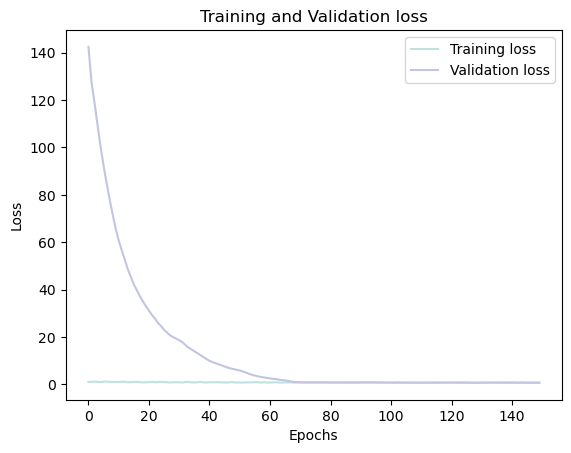

In [3958]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

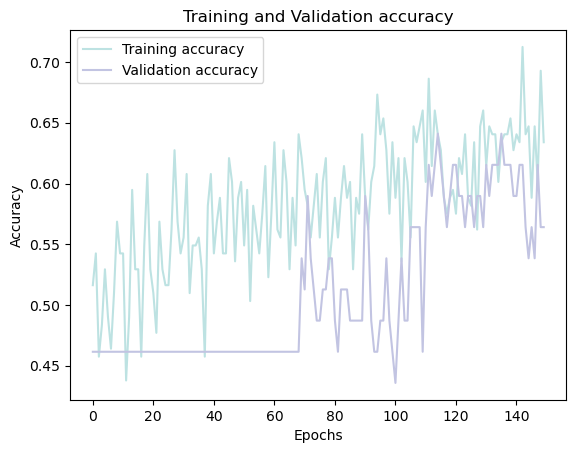

In [3959]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3960]:
# Predicting the test set results
y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.65)

2/2 [==============================] - 0s 15ms/step


In [3961]:
X_test_new=X_test.reset_index(drop=True)
X_test_new

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
0,2024,1,25,10,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0,0,1,93.830002,0,0,1
1,2024,1,22,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,1,0,1,0,1,0,1,0,0,0,0,0,0.000000,0,0,1
2,2024,2,28,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1
3,2024,2,26,17,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,2
4,2024,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.000000,0,0,1
5,2024,2,20,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,0,0,1
6,2024,2,23,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1
7,2024,2,28,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,2
8,2024,1,23,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1
9,2024,2,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,0,0,1


In [3962]:
import numpy as np

# Assuming 2023, 8, 30, 5, 0 are the values you want to predict on
input_data = np.array([[2025, 9, 13, 9, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                       ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Convert the values into a 2D array

# Perform prediction
prediction = model.predict(input_data)

print(prediction)


1/1 [==============================] - 0s 233ms/step
[[0.7798206]]


In [3963]:
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y_pred)


[[0.9713093 ]
 [0.3770415 ]
 [0.2508625 ]
 [0.7083394 ]
 [0.61356527]
 [0.45469886]
 [0.3604069 ]
 [0.30005595]
 [0.55396885]
 [0.72470474]
 [0.9734038 ]
 [0.26152062]
 [0.5061042 ]
 [0.46079177]
 [0.5668417 ]
 [0.527591  ]
 [0.5479679 ]
 [0.38428175]
 [0.674958  ]
 [0.48869485]
 [0.47121632]
 [0.41213915]
 [0.5662576 ]
 [0.5690222 ]
 [0.4117735 ]
 [0.6648062 ]
 [0.47949487]
 [0.7948662 ]
 [0.9975395 ]
 [0.7341674 ]
 [0.5943899 ]
 [0.22146153]
 [0.53388256]
 [0.26629698]
 [0.6194011 ]
 [0.6827006 ]
 [0.7360899 ]
 [0.51793474]
 [0.7288749 ]
 [0.4703506 ]
 [0.63886005]
 [0.63129354]
 [0.5491213 ]
 [0.9757983 ]
 [0.56917775]
 [0.5955454 ]
 [0.2870998 ]
 [0.3441535 ]
 [0.9961156 ]]


In [3964]:
import pandas as pd

# Convert the array to a Series
y_pred_series = pd.Series(y_pred.flatten())

# Print the Series
print(y_pred_series)


0     0.971309
1     0.377041
2     0.250863
3     0.708339
4     0.613565
5     0.454699
6     0.360407
7     0.300056
8     0.553969
9     0.724705
10    0.973404
11    0.261521
12    0.506104
13    0.460792
14    0.566842
15    0.527591
16    0.547968
17    0.384282
18    0.674958
19    0.488695
20    0.471216
21    0.412139
22    0.566258
23    0.569022
24    0.411774
25    0.664806
26    0.479495
27    0.794866
28    0.997540
29    0.734167
30    0.594390
31    0.221462
32    0.533883
33    0.266297
34    0.619401
35    0.682701
36    0.736090
37    0.517935
38    0.728875
39    0.470351
40    0.638860
41    0.631294
42    0.549121
43    0.975798
44    0.569178
45    0.595545
46    0.287100
47    0.344153
48    0.996116
dtype: float32


In [3965]:
y_pred_mean=y_pred_series.mean()
y_pred_mean

0.5666722

In [3966]:
y_pred_new = (y_pred > y_pred_mean*1.2)

In [3967]:
import pandas as pd

# Convert the array to a Series
y_pred_new_series = pd.Series(y_pred_new.flatten())

# Print the Series
print(y_pred_new_series)


0      True
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28     True
29     True
30    False
31    False
32    False
33    False
34    False
35     True
36     True
37    False
38     True
39    False
40    False
41    False
42    False
43     True
44    False
45    False
46    False
47    False
48     True
dtype: bool


In [3968]:
pd.set_option('display.max_columns', None)
y_test

24     0
6      0
222    0
208    1
236    1
173    0
197    1
220    1
9      1
113    0
45     1
207    0
225    1
209    1
82     1
144    1
186    1
15     0
66     1
127    0
33     1
19     0
108    1
30     1
183    0
170    1
10     1
73     1
93     1
154    1
111    1
215    0
25     0
60     0
18     1
126    1
96     1
194    1
137    1
238    0
75     0
117    0
112    1
16     0
193    1
67     1
227    1
38     0
178    1
Name: Candle_direction, dtype: int64

In [3969]:
concatenated_df = pd.concat([y_pred_new_series, X_test_new],axis='columns')

In [3970]:
import pandas as pd

# Assuming you have DataFrame df with columns 'Year', 'Month', 'Day', 'Hour', and 'Minute'
# Create a DataFrame with these columns
date_time_df = pd.DataFrame({
    'Year': concatenated_df['Year'],
    'Month': concatenated_df['Month'],
    'Day': concatenated_df['Day'],
    'Hour': concatenated_df['Hour'],
    'Minute': concatenated_df['Minute']
})

# Concatenate date and time columns into a single string column
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df)
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')  # No timezone specified here
else:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df[['Year', 'Month', 'Day']])
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d')  # No timezone specified here

# Convert the DataFrame to a datetime index
date_time_index = pd.to_datetime(date_time_df['DateTime'], utc=True)  # Make the index timezone aware

# Assign the datetime index back to your DataFrame
concatenated_df.index = date_time_index

# Drop the date-time features columns if needed
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
else:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day'])


In [3971]:
concatenated_df

,0,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-25 10:00:00+00:00,True,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0,0,1,93.830002,0,0,1
2024-01-22 16:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,1,0,1,0,1,0,1,0,0,0,0,0,0.000000,0,0,1
2024-02-28 15:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1
2024-02-26 17:00:00+00:00,True,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,2
2024-03-01 13:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.000000,0,0,1
2024-02-20 14:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,0,0,1
2024-02-23 14:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1
2024-02-28 13:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,2
2024-01-23 11:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,0,1


In [3972]:

df_new

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-22 09:00:00+01:00,92.949997,93.720001,92.949997,93.580002,93.580002,0
2024-01-22 10:00:00+01:00,93.610001,93.769997,93.290001,93.580002,93.580002,61142
2024-01-22 11:00:00+01:00,93.599998,93.620003,93.169998,93.459999,93.459999,37578
2024-01-22 12:00:00+01:00,93.470001,93.620003,93.330002,93.470001,93.470001,57753
2024-01-22 13:00:00+01:00,93.449997,93.709999,93.379997,93.470001,93.470001,30145
...,...,...,...,...,...,...
2024-03-01 13:00:00+01:00,110.580002,110.839996,110.419998,110.800003,110.800003,114643
2024-03-01 14:00:00+01:00,110.760002,110.820000,110.379997,110.440002,110.440002,76098
2024-03-01 15:00:00+01:00,110.440002,110.480003,107.680000,109.660004,109.660004,285829


In [3973]:
import pandas as pd

# Concatenate the two DataFrames along axis 0 (rows)
# This will stack the DataFrames on top of each other
concatenated_df_new = pd.concat([concatenated_df, df_new], axis='columns')
concatenated_df_new=concatenated_df_new.drop(columns=['EMASignal', 'isPivot', 'CHOCH_pattern_detected', 
                                  'fibonacci_signal', 'SL','TP','MinSwing','MaxSwing',
                                 'LBD_detected','LBH_detected','SR_signal','isBreakOut','candlestick_signal',
                                 'result','signal1','buy_signal','Position','sell_signal','fractal_high',
                                 'fractals_low','VSignal','PriceSignal','TotSignal','SLSignal','grid_signal',
                                 'ordersignal','SLSignal_heiken','EMASignal1','long_signal','martiangle_signal',
                                                     'fractal_low','buy_signal1','sell_signal1','fractals_high'])




In [3974]:
concatenated_df_new=concatenated_df_new.fillna(0)

In [3975]:
import pandas as pd

# Convert boolean column 'A' to integer
concatenated_df_new[0] = concatenated_df_new[0].astype(int)

# Display the DataFrame after conversion

#concatenated_df_new = concatenated_df_new[concatenated_df_new['Volume'] != 0]
concatenated_df_new = concatenated_df_new[(concatenated_df_new[['Open', 'Close', 'High', 'Low']] != 0).all(axis=1)]
concatenated_df_new

,0,Open,High,Low,Close,Adj Close,Volume
2024-01-22 08:00:00+00:00,0,92.949997,93.720001,92.949997,93.580002,93.580002,0.0
2024-01-22 09:00:00+00:00,0,93.610001,93.769997,93.290001,93.580002,93.580002,61142.0
2024-01-22 10:00:00+00:00,0,93.599998,93.620003,93.169998,93.459999,93.459999,37578.0
2024-01-22 11:00:00+00:00,0,93.470001,93.620003,93.330002,93.470001,93.470001,57753.0
2024-01-22 12:00:00+00:00,0,93.449997,93.709999,93.379997,93.470001,93.470001,30145.0
...,...,...,...,...,...,...,...
2024-03-01 12:00:00+00:00,0,110.580002,110.839996,110.419998,110.800003,110.800003,114643.0
2024-03-01 13:00:00+00:00,0,110.760002,110.820000,110.379997,110.440002,110.440002,76098.0
2024-03-01 14:00:00+00:00,0,110.440002,110.480003,107.680000,109.660004,109.660004,285829.0
2024-03-01 15:00:00+00:00,0,109.680000,109.940002,109.360001,109.480003,109.480003,38603.0


In [3976]:
concatenated_df_new[concatenated_df_new[0]!=0]

,0,Open,High,Low,Close,Adj Close,Volume
2024-01-24 10:00:00+00:00,1,93.529999,93.849998,93.389999,93.510002,93.510002,61798.0
2024-01-25 10:00:00+00:00,1,93.059998,93.059998,92.690002,92.820000,92.820000,43504.0
2024-01-29 15:00:00+00:00,1,94.410004,94.669998,94.290001,94.589996,94.589996,30112.0
2024-02-02 11:00:00+00:00,1,98.489998,98.639999,98.349998,98.529999,98.529999,36731.0
2024-02-06 15:00:00+00:00,1,97.349998,97.599998,97.190002,97.489998,97.489998,60690.0
2024-02-07 10:00:00+00:00,1,99.910004,99.970001,99.440002,99.540001,99.540001,64081.0
2024-02-09 10:00:00+00:00,1,101.980003,102.080002,101.839996,102.080002,102.080002,38250.0
2024-02-12 15:00:00+00:00,1,102.400002,102.599998,102.260002,102.279999,102.279999,23952.0
2024-02-14 10:00:00+00:00,1,100.980003,101.120003,100.860001,101.080002,101.080002,16840.0
2024-02-16 11:00:00+00:00,1,103.860001,104.199997,103.720001,103.959999,103.959999,82475.0


In [3977]:
concatenated_df_new_filtered = concatenated_df_new['2024-02-01 14:30:00+00:00':'2024-03-03 14:30:00+00:00']

In [3978]:
import numpy as np
import plotly.graph_objects as go

# Assuming concatenated_df_new is already defined

def pointpos(x):
    if x[0] == 1:
        return x['Low'] + 0.5e-3
    else:
        return np.nan

concatenated_df_new_filtered['pointpos'] = concatenated_df_new_filtered.apply(lambda row: pointpos(row), axis=1)

fig = go.Figure(data=[go.Candlestick(x=concatenated_df_new_filtered.index,
                open=concatenated_df_new_filtered['Open'],
                high=concatenated_df_new_filtered['High'],
                low=concatenated_df_new_filtered['Low'],
                close=concatenated_df_new_filtered['Close'])])

fig.add_scatter(x=concatenated_df_new_filtered.index, 
                y=concatenated_df_new_filtered['pointpos'], 
                mode="markers",
                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color='DarkSlateGrey')),
                name="Signal")

fig.update_layout(
    title="Candlestick Chart with Signal",
    xaxis_title="Date",
    yaxis_title="Price",
    autosize=False,
    width=800,
    height=700,  # Adjusted height
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgb(30,30,30)',  # Darker plot background
    font=dict(color="white"),  # White font color
    xaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
    yaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
)

fig.show()


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_18048\1414781248.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

